# The math of deep learning

> What I cannot create, I do not understand - Richard Feynman 

![title](https://qph.ec.quoracdn.net/main-qimg-87833c78a604ff07a82ff7787574e197-c)

Richard Feynman who is considered one of the greatest scientists who ever lived had something scribbled on his blackboard at the time of his death.

What I cannot create I do not understand.

So this time we will create in order to understand.


## Input function
![title](https://github.com/bcarlyle/Momentum-AI-machine-learning-course/raw/master/lesson4/files/xinput.png)
## Optimization function
![title](https://github.com/bcarlyle/Momentum-AI-machine-learning-course/raw/master/lesson4/files/optimization.gif)
## Turing machine
![title](https://github.com/bcarlyle/Momentum-AI-machine-learning-course/raw/master/lesson4/files/turing_machine.JPG)

# Math in deep learning
Deep learning draws math from three different sources, linear algebra, calculus and statistics. 
## Linear algebra
http://machinelearningmastery.com/linear-algebra-machine-learning/
## Calculus
https://www.umiacs.umd.edu/~hal/courses/2013S_ML/math4ml.pdf
## Statistics
http://machinelearningmastery.com/crash-course-statistics-machine-learning/
Neural network from scratch



# Exercise 1


In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

In [16]:
x = np.arange(-9,9)
b = -5

w = np.array([3])

y = x*w + b

In [17]:
y

array([-32, -29, -26, -23, -20, -17, -14, -11,  -8,  -5,  -2,   1,   4,
         7,  10,  13,  16,  19])

## Building a line chart for y = k*x + m

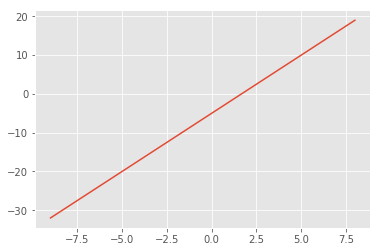

In [18]:
plt.plot(x,y)
plt.grid(1)

In [19]:
### where is the minimum of this function??

In [20]:
x = np.arange(-7,9)
b = -5

w = np.array([3])

y = x**2*w + b

In [21]:
## Parabol of the function y for minimization

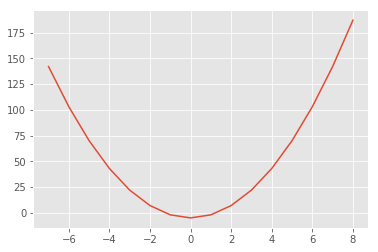

In [22]:
plt.plot(x,y)
plt.grid(1)

### where is the minimum of this function???

## Higher order of dimension, adding another input to our data

![https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/03/06100746/grad.png](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/03/06100746/grad.png)

# Exercise 2
![title](http://wiki.fast.ai/images/math/6/e/0/6e0e60f3b06c79ac0fddeca87dbc21dd.png)
## Calculating derivative
Let's write code to calculate the derivative for f(x) = x^2. We know the derivative should be 2x.

## Derivatives in Deep Learning
![title](https://media1.giphy.com/media/Fg9yN8G9RHvBS/giphy.gif)
Machine learning uses derivatives to find optimal solutions to problems. It’s useful in optimization functions like Gradient Descent because it helps us decide whether to increase or decrease our weights in order to maximize or minimize some metrics (e.g. loss)

It also helps us model nonlinear functions as linear functions (tangent lines), which have constant slopes. With a constant slope we can decide whether to move up or down the slope (increase or decrease our weights) to get closer to the target value (class label).

In [ ]:
def xSquared(x):
    return x**2

def getDeriv(func, x):
  h = 0.0001
  return (func(x+h) - func(x)) / h

x = 3
derivative = getDeriv(xSquared, x)
actual = 2*x

derivative, actual = 6.0001, 6

# Exercise 3
## Making XOR
![title](files/xor.png)
Exclusive or or exclusive disjunction is a logical operation that outputs true only when inputs differ (one is true, the other is false).
It is symbolized by the prefix operator J and by the infix operators XOR (/ˌɛks ˈɔːr/), EOR, EXOR, ⊻, ⊕, ↮, and ≢. The negation of XOR is logical biconditional, which outputs true only when both inputs are the same.
It gains the name "exclusive or" because the meaning of "or" is ambiguous when both operands are true; the exclusive or operator excludes that case. This is sometimes thought of as "one or the other but not both". This could be written as "A or B, but not, A and B".
More generally, XOR is true only when an odd number of inputs are true. A chain of XORs—a XOR b XOR c XOR d (and so on)—is true whenever an odd number of the inputs are true and is false whenever an even number of inputs are true.

In [10]:
import numpy as np

# sigmoid function
def nonlin(x, deriv=False):  
    if(deriv==True):
        return (x*(1-x))
    
    return 1/(1+np.exp(-x))  

The following code creates the input matrix.

In [11]:

#input data
X = np.array([[0,0,1],  # Note: there is a typo on this line in the video
            [0,1,1],
            [1,0,1],
            [1,1,1]])

The output of the exclusive OR function follows.

In [12]:

#output data
y = np.array([[0],
             [1],
             [1],
             [0]])

The seed for the random generator is set so that it will return the same random numbers each time, which is sometimes useful for debugging.

Now we intialize the weights to random values. syn0 are the weights between the input layer and the hidden layer. It is a 3x4 matrix because there are two input weights plus a bias term (=3) and four nodes in the hidden layer (=4). syn1 are the weights between the hidden layer and the output layer. It is a 4x1 matrix because there are 4 nodes in the hidden layer and one output. Note that there is no bias term feeding the output layer in this example. The weights are initially generated randomly because optimization tends not to work well when all the weights start at the same value. Note that neither of the neural networks shown in the video describe the example.

In [13]:
#synapses
syn0 = 2*np.random.random((3,4)) - 1  # 3x4 matrix of weights ((2 inputs + 1 bias) x 4 nodes in the hidden layer)
syn1 = 2*np.random.random((4,1)) - 1  # 4x1 matrix of weights. (4 nodes x 1 output) - no bias term in the hidden layer.

This is the main training loop. The output shows the evolution of the error between the model and desired. The error steadily decreases.

In [14]:
#training step
# Python2 Note: In the follow command, you may improve 
#   performance by replacing 'range' with 'xrange'. 
for j in range(60000):  
    
    # Calculate forward through the network.
    l0 = X
    l1 = nonlin(np.dot(l0, syn0))
    l2 = nonlin(np.dot(l1, syn1))
    
    # Back propagation of errors using the chain rule. 
    l2_error = y - l2
    if(j % 10000) == 0:   # Only print the error every 10000 steps, to save time and limit the amount of output. 
        print("Error: " + str(np.mean(np.abs(l2_error))))
        
    l2_delta = l2_error*nonlin(l2, deriv=True)
    
    l1_error = l2_delta.dot(syn1.T)
    
    l1_delta = l1_error * nonlin(l1,deriv=True)
    
    #update weights (no learning rate term)
    syn1 += l1.T.dot(l2_delta)
    syn0 += l0.T.dot(l1_delta)
    
print("Output after training")
print(l2)

Error: 0.500386946116
Error: 0.00867360161359
Error: 0.00586357615026
Error: 0.00469264457551
Error: 0.0040148843226
Error: 0.00356083564683
Output after training
[[ 0.00271394]
 [ 0.99695061]
 [ 0.99678411]
 [ 0.00394104]]


## Another implementation of XOR

In [49]:
#   XOR.py-A very simple neural network to do exclusive or.
#   sigmoid activation for hidden layer, no (or linear) activation for output
 
import numpy as np
 
epochs = 20000                                  # Number of iterations
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 3, 1
L = .1                                          # learning rate      
 
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([ [0],   [1],   [1],   [0]])
 
def sigmoid (x): return 1/(1 + np.exp(-x))      # activation function
def sigmoid_(x): return x * (1 - x)             # derivative of sigmoid
                                                # weights on layer inputs
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))
 
for i in range(epochs):
 
    H = sigmoid(np.dot(X, Wh))                  # hidden layer results
    Z = np.dot(H,Wz)                            # output layer, no activation
    E = Y - Z                                   # how much we missed (error)
    dZ = E * L                                  # delta Z
    Wz +=  H.T.dot(dZ)                          # update output layer weights
    dH = dZ.dot(Wz.T) * sigmoid_(H)             # delta H
    Wh +=  X.T.dot(dH)                          # update hidden layer weights
     
print(Z)                # what have we learnt?

[[-0.02884591]
 [ 0.99902743]
 [ 0.99920954]
 [ 0.01610007]]


# Exercise 4
![title](https://codeahoy.com/img/blogs/deep_neural_network.png)
## Neural network as object

In [51]:
X = np.array([[1,2], [1,2]])
y = np.array([1,2])

class Neural_Network(object):
    def __init__(self):        
        #Define Hyperparameters
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        dJdW2 = np.dot(self.a2.T, delta3)
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        dJdW1 = np.dot(X.T, delta2)  
        
        return dJdW1, dJdW2

In [52]:
NN = Neural_Network()

In [53]:
cost1 = NN.costFunction(X,y)

In [54]:
dJdW1, dJdW2 = NN.costFunctionPrime(X,y)

ValueError: shapes (2,2) and (1,3) not aligned: 2 (dim 1) != 1 (dim 0)

In [38]:
dJdW1

NameError: name 'dJdW1' is not defined

# Exercise 5
![title](files/optimization.gif)
## Graded function


## 1 - Gradient Descent

A simple optimization method in machine learning is gradient descent (GD). When you take gradient steps with respect to all $m$ examples on each step, it is also called Batch Gradient Descent. 

**Warm-up exercise**: Implement the gradient descent update rule. The  gradient descent rule is, for $l = 1, ..., L$: 
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{1}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{2}$$

where L is the number of layers and $\alpha$ is the learning rate. All parameters should be stored in the `parameters` dictionary. Note that the iterator `l` starts at 0 in the `for` loop while the first parameters are $W^{[1]}$ and $b^{[1]}$. You need to shift `l` to `l+1` when coding.

In [50]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from testCases_v2 import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

ModuleNotFoundError: No module named 'testCases_v2'

In [40]:
# GRADED FUNCTION: update_parameters_with_gd

def update_parameters_with_gd(parameters, grads, learning_rate):
    """
    Update parameters using one step of gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters to be updated:
                    parameters['W' + str(l)] = Wl
                    parameters['b' + str(l)] = bl
    grads -- python dictionary containing your gradients to update each parameters:
                    grads['dW' + str(l)] = dWl
                    grads['db' + str(l)] = dbl
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """

    L = len(parameters) // 2 # number of layers in the neural networks

    # Update rule for each parameter
    for l in range(L):
        ### START CODE HERE ### (approx. 2 lines)
        parameters["W" + str(l+1)] = None
        parameters["b" + str(l+1)] = None
        ### END CODE HERE ###
        
    return parameters

# Exercise 6
![title](https://www.kernix.com/doc/data/cnn.png)
## Convolutinal network from scratch


In [ ]:
import pickle #saving and loading our serialized model 
import numpy as np #matrix math
from app.model.preprocessor import Preprocessor as img_prep #image preprocessing

#class for loading our saved model and classifying new images
class LiteOCR:
    
	def __init__(self, fn="alpha_weights.pkl", pool_size=2):
        #load the weights from the pickle file and the meta data
		[weights, meta] = pickle.load(open(fn, 'rb'), encoding='latin1') #currently, this class MUST be initialized from a pickle file
		#list to store labels
        self.vocab = meta["vocab"]
        
        #how many rows and columns in an image
		self.img_rows = meta["img_side"] ; self.img_cols = meta["img_side"]
        
        #load our CNN
		self.CNN = LiteCNN()
        #with our saved weights
		self.CNN.load_weights(weights)
        #define the pooling layers size
		self.CNN.pool_size=int(pool_size)
    
    #classify new image
	def predict(self, image):
		print(image.shape)
        #vectorize the image into the right shape for our network
		X = np.reshape(image, (1, 1, self.img_rows, self.img_cols))
		X = X.astype("float32")
        
        #make the prediction
		predicted_i = self.CNN.predict(X)
        #return the predicted label
		return self.vocab[predicted_i]

class LiteCNN:
	def __init__(self):
        # a place to store the layers
		self.layers = [] 
        # size of pooling area for max pooling
		self.pool_size = None 

	def load_weights(self, weights):
		assert not self.layers, "Weights can only be loaded once!"
        #add the saved matrix values to the convolutional network
		for k in range(len(weights.keys())):
			self.layers.append(weights['layer_{}'.format(k)])

	def predict(self, X):        
        #here is where the network magic happens at a high level
        h = self.cnn_layer(X, layer_i=0, border_mode="full"); X= h
        h = self.relu_layer(X); X = h;
        h = self.cnn_layer(X, layer_i=2, border_mode="valid"); X = h
        h = self.relu_layer(X); X = h;
        h = self.maxpooling_layer(X); X = h
        h = self.dropout_layer(X, .25); X = h
        h = self.flatten_layer(X, layer_i=7); X = h;
        h = self.dense_layer(X, fully, layer_i=10); x = H
        h = self.softmax_layer2D(X); x = h
        max_i = self.classify(X)
        return max_i[0]
    
    #given our feature map we've learned from convolving around the image
    #lets make it more dense by performing pooling, specifically max pooling
    #we'll select the max values from the image matrix and use that as our new feature map
	def maxpooling_layer(self, convolved_features):
        #given our learned features and images
		nb_features = convolved_features.shape[0]
		nb_images = convolved_features.shape[1]
		conv_dim = convolved_features.shape[2]
		res_dim = int(conv_dim / self.pool_size)       #assumed square shape

        #initialize our more dense feature list as empty
		pooled_features = np.zeros((nb_features, nb_images, res_dim, res_dim))
        #for each image
		for image_i in range(nb_images):
            #and each feature map
			for feature_i in range(nb_features):
                #begin by the row
				for pool_row in range(res_dim):
                    #define start and end points
					row_start = pool_row * self.pool_size
					row_end   = row_start + self.pool_size

                    #for each column (so its a 2D iteration)
					for pool_col in range(res_dim):
                        #define start and end points
						col_start = pool_col * self.pool_size
						col_end   = col_start + self.pool_size
                        
                        #define a patch given our defined starting ending points
						patch = convolved_features[feature_i, image_i, row_start : row_end,col_start : col_end]
                        #then take the max value from that patch
                        #store it. this is our new learned feature/filter
						pooled_features[feature_i, image_i, pool_row, pool_col] = np.max(patch)
		return pooled_features

    #convolution is the most important of the matrix operations here
    #well define our input, lauyer number, and a border mode (explained below)
	def cnn_layer(self, X, layer_i=0, border_mode = "full"):
        #we'll store our feature maps and bias value in these 2 vars
		features = self.layers[layer_i]["param_0"]
		bias = self.layers[layer_i]["param_1"]
        #how big is our filter/patch?
		patch_dim = features[0].shape[-1]
        #how many features do we have?
		nb_features = features.shape[0]
        #How big is our image?
		image_dim = X.shape[2] #assume image square
        #R G B values
		image_channels = X.shape[1]
        #how many images do we have?
		nb_images = X.shape[0]
        
        #With border mode "full" you get an output that is the "full" size as the input. 
        #That means that the filter has to go outside the bounds of the input by "filter size / 2" - 
        #the area outside of the input is normally padded with zeros.
		if border_mode == "full":
			conv_dim = image_dim + patch_dim - 1
        #With border mode "valid" you get an output that is smaller than the input because 
        #the convolution is only computed where the input and the filter fully overlap.
		elif border_mode == "valid":
			conv_dim = image_dim - patch_dim + 1
        
        #we'll initialize our feature matrix
		convolved_features = np.zeros((nb_images, nb_features, conv_dim, conv_dim));
        #then we'll iterate through each image that we have
		for image_i in range(nb_images):
            #for each feature 
			for feature_i in range(nb_features):
                #lets initialize a convolved image as empty
				convolved_image = np.zeros((conv_dim, conv_dim))
                #then for each channel (r g b )
				for channel in range(image_channels):
                    #lets extract a feature from our feature map
					feature = features[feature_i, channel, :, :]
                    #then define a channel specific part of our image
					image   = X[image_i, channel, :, :]
                    #perform convolution on our image, using a given feature filter
					convolved_image += self.convolve2d(image, feature, border_mode);

                #add a bias to our convoved image
				convolved_image = convolved_image + bias[feature_i]
                #add it to our list of convolved features (learnings)
				convolved_features[image_i, feature_i, :, :] = convolved_image
		return convolved_features

    #In a dense layer, every node in the layer is connected to every node in the preceding layer.
	def dense_layer(self, X, layer_i=0):
        #so we'll initialize our weight and bias for this layer
		W = self.layers[layer_i]["param_0"]
		b = self.layers[layer_i]["param_1"]
        #and multiply it by our input (dot product)
		output = np.dot(X, W) + b
		return output

	@staticmethod
    
    #so what does the convolution operation look like?, given an image and a feature map (filter)
	def convolve2d(image, feature, border_mode="full"):
        #we'll define the tensor dimensions of the image and the feature
		image_dim = np.array(image.shape)
		feature_dim = np.array(feature.shape)
        #as well as a target dimension
		target_dim = image_dim + feature_dim - 1
        #then we'll perform a fast fourier transform on both the input and the filter
        #performing a convolution can be written as a for loop but for many convolutions
        #this approach is too comp. expensive/slow. it can be performed orders of magnitude
        #faster using a fast fourier transform. 
		fft_result = np.fft.fft2(image, target_dim) * np.fft.fft2(feature, target_dim)
        #and set the result to our target 
		target = np.fft.ifft2(fft_result).real

		if border_mode == "valid":
			# To compute a valid shape, either np.all(x_shape >= y_shape) or
			# np.all(y_shape >= x_shape).
            #decide a target dimension to convolve around
			valid_dim = image_dim - feature_dim + 1
			if np.any(valid_dim < 1):
				valid_dim = feature_dim - image_dim + 1
			start_i = (target_dim - valid_dim) // 2
			end_i = start_i + valid_dim
			target = target[start_i[0]:end_i[0], start_i[1]:end_i[1]]
		return target

	def relu_layer(x):
        #turn all negative values in a matrix into zeros
		z = np.zeros_like(x)
		return np.where(x>z,x,z)

	def softmax_layer2D(w):
        #this function will calculate the probabilities of each
        #target class over all possible target classes. 
		maxes = np.amax(w, axis=1)
		maxes = maxes.reshape(maxes.shape[0], 1)
		e = np.exp(w - maxes)
		dist = e / np.sum(e, axis=1, keepdims=True)
		return dist

    #affect the probability a node will be turned off by multiplying it
    #by a p values (.25 we define)
	def dropout_layer(X, p):
		retain_prob = 1. - p
		X *= retain_prob
		return X

    #get the largest probabililty value from the list
	def classify(X):
		return X.argmax(axis=-1)

    #tensor transformation, less dimensions
	def flatten_layer(X):
		flatX = np.zeros((X.shape[0],np.prod(X.shape[1:])))
		for i in range(X.shape[0]):
			flatX[i,:] = X[i].flatten(order='C')
		return flatX

# Exericise 7
![title](files/turing_machine.JPG)
## LSTM from scratch

In [ ]:
import random

import numpy as np
import math

def sigmoid(x): 
    return 1. / (1 + np.exp(-x))

def sigmoid_derivative(values): 
    return values*(1-values)

def tanh_derivative(values): 
    return 1. - values ** 2

# createst uniform random array w/ values in [a,b) and shape args
def rand_arr(a, b, *args): 
    np.random.seed(0)
    return np.random.rand(*args) * (b - a) + a

class LstmParam:
    def __init__(self, mem_cell_ct, x_dim):
        self.mem_cell_ct = mem_cell_ct
        self.x_dim = x_dim
        concat_len = x_dim + mem_cell_ct
        # weight matrices
        self.wg = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len)
        self.wi = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len) 
        self.wf = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len)
        self.wo = rand_arr(-0.1, 0.1, mem_cell_ct, concat_len)
        # bias terms
        self.bg = rand_arr(-0.1, 0.1, mem_cell_ct) 
        self.bi = rand_arr(-0.1, 0.1, mem_cell_ct) 
        self.bf = rand_arr(-0.1, 0.1, mem_cell_ct) 
        self.bo = rand_arr(-0.1, 0.1, mem_cell_ct) 
        # diffs (derivative of loss function w.r.t. all parameters)
        self.wg_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.wi_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.wf_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.wo_diff = np.zeros((mem_cell_ct, concat_len)) 
        self.bg_diff = np.zeros(mem_cell_ct) 
        self.bi_diff = np.zeros(mem_cell_ct) 
        self.bf_diff = np.zeros(mem_cell_ct) 
        self.bo_diff = np.zeros(mem_cell_ct) 

    def apply_diff(self, lr = 1):
        self.wg -= lr * self.wg_diff
        self.wi -= lr * self.wi_diff
        self.wf -= lr * self.wf_diff
        self.wo -= lr * self.wo_diff
        self.bg -= lr * self.bg_diff
        self.bi -= lr * self.bi_diff
        self.bf -= lr * self.bf_diff
        self.bo -= lr * self.bo_diff
        # reset diffs to zero
        self.wg_diff = np.zeros_like(self.wg)
        self.wi_diff = np.zeros_like(self.wi) 
        self.wf_diff = np.zeros_like(self.wf) 
        self.wo_diff = np.zeros_like(self.wo) 
        self.bg_diff = np.zeros_like(self.bg)
        self.bi_diff = np.zeros_like(self.bi) 
        self.bf_diff = np.zeros_like(self.bf) 
        self.bo_diff = np.zeros_like(self.bo) 

class LstmState:
    def __init__(self, mem_cell_ct, x_dim):
        self.g = np.zeros(mem_cell_ct)
        self.i = np.zeros(mem_cell_ct)
        self.f = np.zeros(mem_cell_ct)
        self.o = np.zeros(mem_cell_ct)
        self.s = np.zeros(mem_cell_ct)
        self.h = np.zeros(mem_cell_ct)
        self.bottom_diff_h = np.zeros_like(self.h)
        self.bottom_diff_s = np.zeros_like(self.s)
    
class LstmNode:
    def __init__(self, lstm_param, lstm_state):
        # store reference to parameters and to activations
        self.state = lstm_state
        self.param = lstm_param
        # non-recurrent input concatenated with recurrent input
        self.xc = None

    def bottom_data_is(self, x, s_prev = None, h_prev = None):
        # if this is the first lstm node in the network
        if s_prev is None: s_prev = np.zeros_like(self.state.s)
        if h_prev is None: h_prev = np.zeros_like(self.state.h)
        # save data for use in backprop
        self.s_prev = s_prev
        self.h_prev = h_prev

        # concatenate x(t) and h(t-1)
        xc = np.hstack((x,  h_prev))
        self.state.g = np.tanh(np.dot(self.param.wg, xc) + self.param.bg)
        self.state.i = sigmoid(np.dot(self.param.wi, xc) + self.param.bi)
        self.state.f = sigmoid(np.dot(self.param.wf, xc) + self.param.bf)
        self.state.o = sigmoid(np.dot(self.param.wo, xc) + self.param.bo)
        self.state.s = self.state.g * self.state.i + s_prev * self.state.f
        self.state.h = self.state.s * self.state.o

        self.xc = xc
    
    def top_diff_is(self, top_diff_h, top_diff_s):
        # notice that top_diff_s is carried along the constant error carousel
        ds = self.state.o * top_diff_h + top_diff_s
        do = self.state.s * top_diff_h
        di = self.state.g * ds
        dg = self.state.i * ds
        df = self.s_prev * ds

        # diffs w.r.t. vector inside sigma / tanh function
        di_input = sigmoid_derivative(self.state.i) * di 
        df_input = sigmoid_derivative(self.state.f) * df 
        do_input = sigmoid_derivative(self.state.o) * do 
        dg_input = tanh_derivative(self.state.g) * dg

        # diffs w.r.t. inputs
        self.param.wi_diff += np.outer(di_input, self.xc)
        self.param.wf_diff += np.outer(df_input, self.xc)
        self.param.wo_diff += np.outer(do_input, self.xc)
        self.param.wg_diff += np.outer(dg_input, self.xc)
        self.param.bi_diff += di_input
        self.param.bf_diff += df_input       
        self.param.bo_diff += do_input
        self.param.bg_diff += dg_input       

        # compute bottom diff
        dxc = np.zeros_like(self.xc)
        dxc += np.dot(self.param.wi.T, di_input)
        dxc += np.dot(self.param.wf.T, df_input)
        dxc += np.dot(self.param.wo.T, do_input)
        dxc += np.dot(self.param.wg.T, dg_input)

        # save bottom diffs
        self.state.bottom_diff_s = ds * self.state.f
        self.state.bottom_diff_h = dxc[self.param.x_dim:]

class LstmNetwork():
    def __init__(self, lstm_param):
        self.lstm_param = lstm_param
        self.lstm_node_list = []
        # input sequence
        self.x_list = []

    def y_list_is(self, y_list, loss_layer):
        """
        Updates diffs by setting target sequence 
        with corresponding loss layer. 
        Will *NOT* update parameters.  To update parameters,
        call self.lstm_param.apply_diff()
        """
        assert len(y_list) == len(self.x_list)
        idx = len(self.x_list) - 1
        # first node only gets diffs from label ...
        loss = loss_layer.loss(self.lstm_node_list[idx].state.h, y_list[idx])
        diff_h = loss_layer.bottom_diff(self.lstm_node_list[idx].state.h, y_list[idx])
        # here s is not affecting loss due to h(t+1), hence we set equal to zero
        diff_s = np.zeros(self.lstm_param.mem_cell_ct)
        self.lstm_node_list[idx].top_diff_is(diff_h, diff_s)
        idx -= 1

        ### ... following nodes also get diffs from next nodes, hence we add diffs to diff_h
        ### we also propagate error along constant error carousel using diff_s
        while idx >= 0:
            loss += loss_layer.loss(self.lstm_node_list[idx].state.h, y_list[idx])
            diff_h = loss_layer.bottom_diff(self.lstm_node_list[idx].state.h, y_list[idx])
            diff_h += self.lstm_node_list[idx + 1].state.bottom_diff_h
            diff_s = self.lstm_node_list[idx + 1].state.bottom_diff_s
            self.lstm_node_list[idx].top_diff_is(diff_h, diff_s)
            idx -= 1 

        return loss

    def x_list_clear(self):
        self.x_list = []

    def x_list_add(self, x):
        self.x_list.append(x)
        if len(self.x_list) > len(self.lstm_node_list):
            # need to add new lstm node, create new state mem
            lstm_state = LstmState(self.lstm_param.mem_cell_ct, self.lstm_param.x_dim)
            self.lstm_node_list.append(LstmNode(self.lstm_param, lstm_state))

        # get index of most recent x input
        idx = len(self.x_list) - 1
        if idx == 0:
            # no recurrent inputs yet
            self.lstm_node_list[idx].bottom_data_is(x)
        else:
            s_prev = self.lstm_node_list[idx - 1].state.s
            h_prev = self.lstm_node_list[idx - 1].state.h
            self.lstm_node_list[idx].bottom_data_is(x, s_prev, h_prev)
